In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
features, labels = make_blobs(n_samples=300, centers=5, cluster_std=2.5, random_state=42)

In [ ]:
features[:7]

array([[ 2.20626713,  9.45073066],
       [-1.67416538,  7.02083666],
       [-1.98703864,  4.11511082],
       [ 4.08122187,  3.75817092],
       [-5.82966275,  9.50643922],
       [-9.11914788,  6.77109892],
       [ 0.54131542,  2.00147463]])

In [ ]:
labels[:7]

array([0, 4, 0, 1, 0, 3, 4])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kwargs = {"init":"random", "n_init" : 10, "max_iter": 250, "random_state":42}
kmeans = KMeans(n_clusters=4, **kwargs)
kmeans.fit(scaled_features)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.labels_[:7])
print(kmeans.cluster_centers_)

97.37384808575713
4
[0 0 0 1 0 2 1]
[[ 7.18942579e-05  8.47513270e-01]
 [ 1.07779451e+00 -4.04816896e-02]
 [-1.32131120e+00  7.01413400e-01]
 [-7.32981455e-01 -1.67497219e+00]]


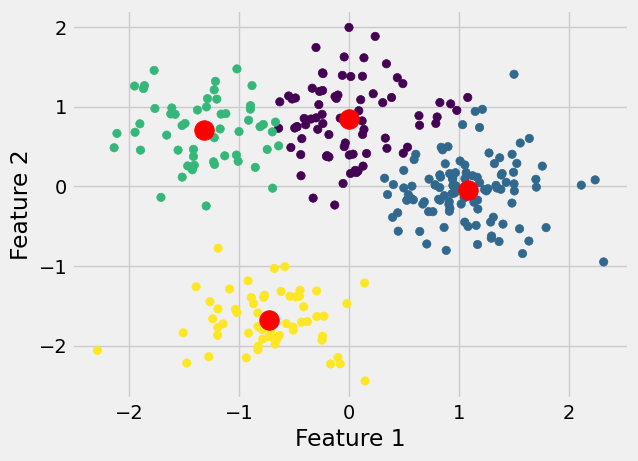

In [ ]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=kmeans.labels_, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, color = "red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
kwargs = {"init":"random", "n_init" : 10, "max_iter": 250, "random_state":42}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kwargs)
  kmeans.fit(scaled_features)
  print("Cluster size: ", k)
  print("SSE: ", kmeans.inertia_)
  sse.append(kmeans.inertia_)
  print("Lables: ", kmeans.labels_[:5])

Cluster size:  1
SSE:  600.0
Lables:  [0 0 0 0 0]
Cluster size:  2
SSE:  355.0191947854368
Lables:  [0 0 0 0 0]
Cluster size:  3
SSE:  142.80367656102462
Lables:  [0 2 0 0 2]
Cluster size:  4
SSE:  97.37384808575713
Lables:  [0 0 0 1 0]
Cluster size:  5
SSE:  83.43542257141178
Lables:  [3 4 4 0 4]
Cluster size:  6
SSE:  72.02124996047758
Lables:  [5 0 3 2 0]
Cluster size:  7
SSE:  62.16380024203516
Lables:  [0 3 3 1 5]
Cluster size:  8
SSE:  55.523406241120135
Lables:  [0 2 2 5 4]
Cluster size:  9
SSE:  49.67181005176748
Lables:  [4 5 5 7 3]
Cluster size:  10
SSE:  44.852349691700574
Lables:  [3 2 2 7 4]


In [ ]:
print("The lowest SSE value: ", min(sse))

The lowest SSE value:  44.852349691700574


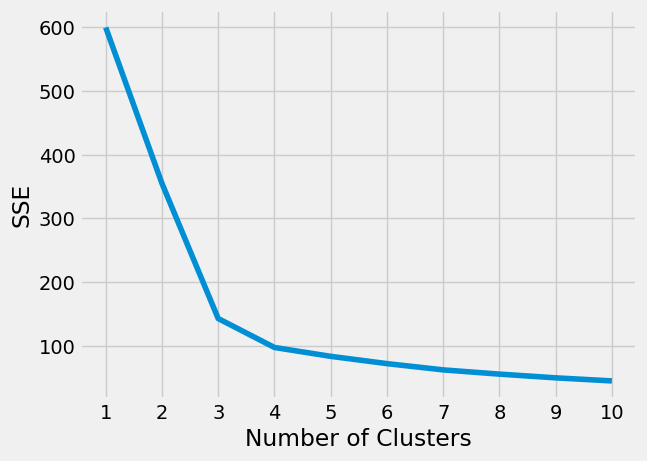

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhoutte = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  print("Silhoutte Score: ", score)
  silhoutte.append(score)

Silhoutte Score:  0.42137018144808774
Silhoutte Score:  0.5540784265591617
Silhoutte Score:  0.5101298393848575
Silhoutte Score:  0.4415931748623268
Silhoutte Score:  0.4374594114466574
Silhoutte Score:  0.4264309529671775
Silhoutte Score:  0.3578490061992549
Silhoutte Score:  0.35185479072979536
Silhoutte Score:  0.36186014277888656


In [ ]:
print("The maximum silhoutte score: ", max(silhoutte))

The maximum silhoutte score:  0.5540784265591617


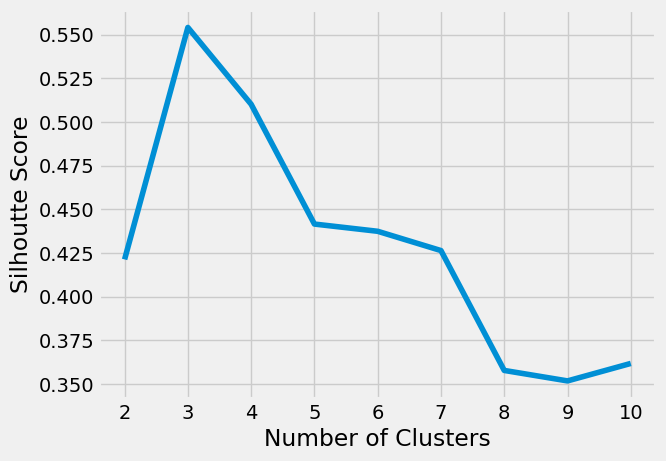

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhoutte)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")
plt.show()

In [ ]:
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print("The Davies Bouldin Index: ", db_index)

The Davies Bouldin Index:  0.8679585802711929


DATASET 2

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kwargs = {"init":"random", "n_init" : 10, "max_iter": 250, "random_state":42}
kmeans = KMeans(n_clusters=4, **kwargs)
kmeans.fit(X_scaled)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

11294.867936274944
11
[0 2 0 ... 0 0 0]
[[-6.48954914e-01  4.82818774e-01 -7.85221704e-01 -2.28748297e-01
  -1.77040549e-01 -2.26448716e-01 -3.47069677e-01 -4.37485995e-01
   6.10351962e-01 -2.93606275e-01  4.74194653e-02]
 [ 7.78690646e-02 -5.16168702e-03  1.13886601e+00 -3.99395943e-01
   5.69414349e+00 -6.71813826e-02  5.36282081e-01  1.74836969e-01
  -1.72087005e+00  3.56595340e+00 -8.76089263e-01]
 [-7.33071162e-02  2.84757183e-02  1.27656910e-01  4.22525771e-01
  -1.67372316e-02  1.08229030e+00  1.30739541e+00  3.00072035e-01
  -1.69108725e-01 -1.66741117e-01 -4.88212527e-01]
 [ 1.03083877e+00 -7.49509912e-01  1.01229032e+00  3.42495707e-02
  -6.69793096e-02 -5.11998851e-01 -5.45359858e-01  4.10672329e-01
  -6.80594822e-01  3.57068177e-01  3.68619653e-01]]


In [ ]:
kwargs = {"init":"random", "n_init" : 10, "max_iter": 250, "random_state":42}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kwargs)
  kmeans.fit(X_scaled)
  print("Cluster size: ", k)
  print("SSE: ", kmeans.inertia_)
  sse.append(kmeans.inertia_)
  print("Lables: ", kmeans.labels_[:5])

Cluster size:  1
SSE:  17589.00000000002
Lables:  [0 0 0 0 0]
Cluster size:  2
SSE:  14330.142460204976
Lables:  [1 1 1 0 1]
Cluster size:  3
SSE:  12629.925637954018
Lables:  [0 1 0 2 0]
Cluster size:  4
SSE:  11294.867936274944
Lables:  [0 2 0 3 0]
Cluster size:  5
SSE:  10155.410717491874
Lables:  [0 0 0 3 0]
Cluster size:  6
SSE:  9364.894882639826
Lables:  [1 1 1 2 1]
Cluster size:  7
SSE:  8645.113962633626
Lables:  [0 0 0 4 0]
Cluster size:  8
SSE:  8303.05768624299
Lables:  [4 4 4 2 4]
Cluster size:  9
SSE:  7966.622765886726
Lables:  [1 1 1 6 1]
Cluster size:  10
SSE:  7724.570709207873
Lables:  [1 8 1 7 1]


In [ ]:
y[:5]

,quality
0,5
1,5
2,5
3,6
4,5


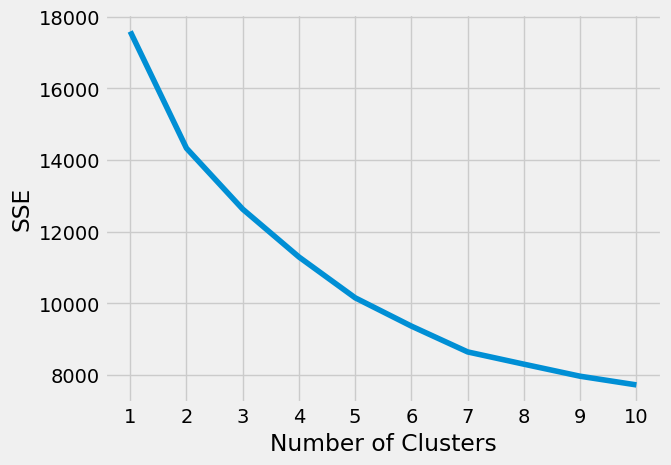

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhoutte = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kwargs)
  kmeans.fit(X_scaled)
  score = silhouette_score(X_scaled, kmeans.labels_)
  print("Silhoutte Score: ", score)
  silhoutte.append(score)

Silhoutte Score:  0.21394174587816794
Silhoutte Score:  0.1892449595930822
Silhoutte Score:  0.20620009652640914
Silhoutte Score:  0.19040878934046146
Silhoutte Score:  0.19216982677684952
Silhoutte Score:  0.19243692093080345
Silhoutte Score:  0.14836681698962417
Silhoutte Score:  0.15436186408091215
Silhoutte Score:  0.14950245618994257


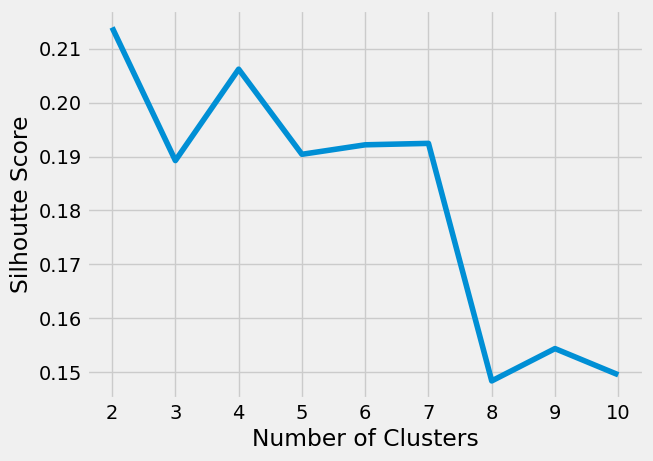

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhoutte)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")
plt.show()